# Train the contender on self-play episodes of the champion

In [1]:
%load_ext autoreload
%autoreload 2

In [138]:
from alphazero.mcts import MCTS
from alphazero.coach import Coach
from alphazero.gomoku_game import GomokuGame as Gomoku, initial_stones
from alphazero.interfaces import TrainParams
from domoku.policies.heuristic_policy import HeuristicPolicy
from alphazero.gomoku_board import GomokuBoard
from domoku import tools as gt

In [3]:
BOARD_SIZE = 15

In [4]:
detector = HeuristicPolicy(BOARD_SIZE, cut_off=.1)
game = Gomoku(BOARD_SIZE, detector=detector, initial=initial_stones(BOARD_SIZE, 4))

2022-07-11 19:49:20.506239: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/wgiersche/.local/share/virtualenvs/DeepGomoku-cXtJ_EtM/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


----

In [13]:
policy = HeuristicPolicy(BOARD_SIZE, cut_off=.1)
mcts = MCTS(game, policy, cpuct=1.0, num_simulations=100, model_threshold=.4)

/Users/wgiersche/.local/share/virtualenvs/DeepGomoku-cXtJ_EtM/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [136]:
board = game.get_initial_board()  # random start positions, sometimes unfair, but so what?
print(board)
import numpy as np

# Two mood versions of the champion playing against each other = less draws
# These settings may change over the training period, once opponents get stronger.
temperatures = [0.4, 0]  # more tight vs more explorative

episode_step = 0
train_examples = []
done = policy.get_winner(board.canonical_representation())
while done is None:
    episode_step += 1
    t = temperatures[episode_step % 2]
    pi = mcts.get_action_prob(board, temperature=t)
    action = np.random.choice(len(pi), p=pi)
    board.act(action)
    print(board)
    done = policy.get_winner(board.canonical_representation())

# The player who made the last move, is the winner.
print (f"The winner is {1-board.get_current_player()}")
board.plot()

K6 K12 L10 K4 (Black next)
K6 K12 L10 K4 K7 (White next)
K6 K12 L10 K4 K7 J8 (Black next)
K6 K12 L10 K4 K7 J8 K9 (White next)
K6 K12 L10 K4 K7 J8 K9 K8 (Black next)
... K12 L10 K4 K7 J8 K9 K8 L8 (White next)
... L10 K4 K7 J8 K9 K8 L8 L9 (Black next)
... K4 K7 J8 K9 K8 L8 L9 J6 (White next)
... K7 J8 K9 K8 L8 L9 J6 I5 (Black next)
... J8 K9 K8 L8 L9 J6 I5 M6 (White next)
... K9 K8 L8 L9 J6 I5 M6 L6 (Black next)
... K8 L8 L9 J6 I5 M6 L6 M9 (White next)
... L8 L9 J6 I5 M6 L6 M9 N10 (Black next)
... L9 J6 I5 M6 L6 M9 N10 M7 (White next)
... J6 I5 M6 L6 M9 N10 M7 N6 (Black next)
... I5 M6 L6 M9 N10 M7 N6 M8 (White next)
... M6 L6 M9 N10 M7 N6 M8 M10 (Black next)
... L6 M9 N10 M7 N6 M8 M10 M5 (White next)
The winner is 0
                                                     
15    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
14    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
13    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
12    .  .  .  .  .  .  .  .  .  .  O  .  .  .  .    
11   

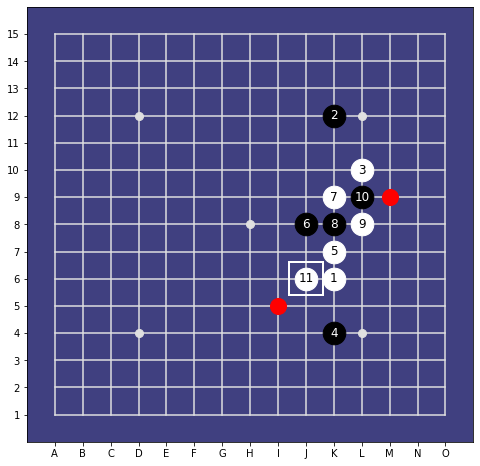

In [141]:
from copy import deepcopy
from domoku.board import GomokuBoard as LegacyBoard
board = deepcopy(board)
stones = board.stones [:-10]
stones = "".join([str(stone) for stone in stones])
board_t = LegacyBoard(n=BOARD_SIZE, disp_width=8, stones=stones, heuristics=policy)
board_t.display()

---

### For reference: The policy's opinion about that board state

In [155]:
board = GomokuBoard(BOARD_SIZE, stones)
pi, v = policy(board.canonical_representation())
print((np.array(pi)*1000).astype(int))
print(f"Value: {v}")


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   8   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   8   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  17   0   8   8   0  27   0]
 [  0   0   0   0   0   0   0   0   8  17   8   0  35   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 307   8   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   8   0  35   0   8  18   8   0]
 [  0   0   0   0   0   0   0  18  45   0   0  18  18  17   0]
 [  0   0   0   0   0   0   0   0 307   9   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   8   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
Value: -0.12350778981345308


---

### The search tree has a similar yet more ascertive opinion
The action counts will inform the next policy and the $max(Q_a)$ may inform the value function.

In most cases, the softmax will agree with the move actually taken, only if the chances are somewhat equally distributed, will the softmax also allow for a choice.

In [164]:
key = board.get_string_representation()
probs = mcts.compute_probs(board, temperature=1.0)
probs = np.array(probs).reshape([BOARD_SIZE, BOARD_SIZE])
print((probs*100).astype(int))
q_advice = [mcts.Q.get((key, i), -float('inf')) for i in range(225)]
print()
print(f"Value from max(Q): {np.max(q_advice)}")

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 56  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 40  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]

Value from max(Q): -0.07781051466605755


# Symmetries

In [160]:
math_rep = board.canonical_representation()
symmetries = game.get_symmetries(math_rep, probs)
symmetries[0][0].shape

(17, 17, 3)

We see the board diagonally flipped

In [165]:
gt.print_channels(symmetries[0][0])

shape: (17, 17, 3)
[[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 2 1 2 0 0 0 0 0 3]
 [3 0 0 0 1 0 2 2 1 2 0 0 1 0 0 0 3]
 [3 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]]


In [167]:
for i in range(1):
    print((np.array(symmetries[i][1]).reshape(15, 15) * 100).astype(int))
    print()

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 56  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 40  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]



---

# TODO: Training

Would be nice to see the training converge (and overfit) with a single episode in its 8 symmetries, and validate the overfitted against a board with all stones shifted. We'd expect only minor differences due to the different border influence, but otherwise the conv-only network naturally features translation symmetry.

In [168]:
from alphazero.gomoku_model import NeuralNetAdapter, GomokuModel

In [194]:
the_model = NeuralNetAdapter(BOARD_SIZE)

In [195]:
the_model.predict(np.expand_dims(math_rep, axis=0).astype(float))

(<tf.Tensor: shape=(1, 225), dtype=float32, numpy=
 array([[0.00306087, 0.00466489, 0.00555502, 0.00306087, 0.00388482,
         0.00627402, 0.00462206, 0.00490964, 0.00306087, 0.00306087,
         0.00306087, 0.00527334, 0.00321493, 0.00385122, 0.00512841,
         0.0030836 , 0.00348671, 0.00306087, 0.00406948, 0.00306087,
         0.00306087, 0.00306087, 0.00306087, 0.00360089, 0.00354148,
         0.00362952, 0.00327728, 0.00306087, 0.00369778, 0.00411889,
         0.00316246, 0.00440491, 0.00306087, 0.0075722 , 0.00777036,
         0.00513006, 0.00541622, 0.00704602, 0.00750286, 0.00742823,
         0.00500624, 0.007187  , 0.0043631 , 0.00708181, 0.00718412,
         0.00350399, 0.00388717, 0.00381796, 0.00306087, 0.0039538 ,
         0.00306087, 0.00306087, 0.00789546, 0.00439931, 0.00306087,
         0.00306087, 0.00496746, 0.00561695, 0.00588145, 0.00685185,
         0.00306087, 0.00306087, 0.00583773, 0.00498733, 0.00716286,
         0.00306087, 0.00306087, 0.0047185 , 0.00399

In [171]:
np.expand_dims(math_rep, axis=0).shape

(1, 17, 17, 3)

In [174]:
the_model.policy.summary()

Model: "gomoku_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          multiple                  11648     
                                                                 
 Potential_0 (Conv2D)        multiple                  123936    
                                                                 
 Potential_1 (Conv2D)        multiple                  123936    
                                                                 
 Potential_2 (Conv2D)        multiple                  123936    
                                                                 
 Potential_3 (Conv2D)        multiple                  123936    
                                                                 
 Potential_4 (Conv2D)        multiple                  123936    
                                                                 
 conv2d_22 (Conv2D)          multiple                 

In [176]:
params = TrainParams(
    epochs_per_train=10,
    update_threshold=0.6,
    max_queue_length=8192,    # Number of game examples to keep to train the neural networks.
    num_simulations=25,
    arena_compare=2,         # Number of games to play during arena play to evaluate new network.
    cpuct=1.0,
    checkpoint_dir='./temperature/',
    load_model=False,
    load_folder_file=('/dev/models/8x100x50', 'best.pth.tar'),
    num_iters_for_train_examples_history=4,
    num_iterations=2,
    num_episodes=2,
    temperature_threshold=12
)
coach = Coach(game, params=params)

In [10]:
examples = coach.execute_episode(mcts)

In [12]:
len(examples)

120

In [177]:
policy = HeuristicPolicy(BOARD_SIZE, cut_off=.1)
mcts = MCTS(game, policy, cpuct=1.0, num_simulations=100, model_threshold=.4)

/Users/wgiersche/.local/share/virtualenvs/DeepGomoku-cXtJ_EtM/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [179]:
examples = coach.create_trajectories(mcts, 1)

   Self Play: 100%|██████████| 2/2 [04:22<00:00, 131.08s/it]


In [181]:
len(examples)

496

In [182]:
ex = examples[-1]

In [185]:
len(ex)

3

In [186]:
ex[0].shape

(17, 17, 3)

In [205]:
print((np.array(ex[1])*100).reshape((15, 15)).astype(int))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 2 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 2 3 7 2 1 0 0 0 0 0]
 [0 0 0 0 1 2 5 0 2 1 0 0 0 0 0]
 [0 0 0 0 0 1 3 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 2 1 1 0 0 0 0 0]
 [0 0 0 0 1 2 3 3 2 1 0 0 0 0 0]
 [0 0 0 0 1 3 3 3 2 1 0 0 0 0 0]
 [0 0 0 0 1 2 0 2 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [189]:
ex[2]

1

In [190]:
gt.print_channels(ex[0])

shape: (17, 17, 3)
[[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 1 0 0 2 1 0 0 0 3]
 [3 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]]


In [232]:
params = TrainParams(
    epochs_per_train=1000,
    update_threshold=0.6,
    max_queue_length=8192,    # Number of game examples to keep to train the neural networks.
    num_simulations=25,
    arena_compare=2,         # Number of games to play during arena play to evaluate new network.
    cpuct=1.0,
    checkpoint_dir='./temperature/',
    load_model=False,
    load_folder_file=('/dev/models/8x100x50', 'best.pth.tar'),
    num_iters_for_train_examples_history=4,
    num_iterations=2,
    num_episodes=2,
    temperature_threshold=12
)

the_model.train(examples, params)

Epoch: 1000, Loss: 6.753357410430908
Epoch: 1000, Loss: 6.750704765319824
Epoch: 1000, Loss: 6.748652935028076
Epoch: 1000, Loss: 6.744075775146484
Epoch: 1000, Loss: 6.7397141456604
Epoch: 1000, Loss: 6.736026763916016
Epoch: 1000, Loss: 6.73242712020874
Epoch: 1000, Loss: 6.72878360748291
Epoch: 1000, Loss: 6.725214958190918
Epoch: 1000, Loss: 6.7216997146606445
Epoch: 1000, Loss: 6.718466281890869
Epoch: 1000, Loss: 6.715295314788818
Epoch: 1000, Loss: 6.712080001831055
Epoch: 1000, Loss: 6.708822727203369
Epoch: 1000, Loss: 6.70557975769043
Epoch: 1000, Loss: 6.702432155609131
Epoch: 1000, Loss: 6.699307441711426
Epoch: 1000, Loss: 6.696255207061768
Epoch: 1000, Loss: 6.693260192871094
Epoch: 1000, Loss: 6.690584659576416
Epoch: 1000, Loss: 6.689396381378174
Epoch: 1000, Loss: 6.688157558441162
Epoch: 1000, Loss: 6.6865692138671875
Epoch: 1000, Loss: 6.685136795043945
Epoch: 1000, Loss: 6.68588924407959
Epoch: 1000, Loss: 6.686761856079102
Epoch: 1000, Loss: 6.688048362731934
Epoch

In [230]:
board.plot()

                                                     
15    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
14    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
13    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
12    .  .  .  .  .  .  .  .  .  .  O  .  .  .  .    
11    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
10    .  .  .  .  .  .  .  .  .  .  .  X  .  .  .    
 9    .  .  .  .  .  .  .  .  .  .  X  O  .  .  .    
 8    .  .  .  .  .  .  .  .  .  O  O  X  .  .  .    
 7    .  .  .  .  .  .  .  .  .  .  X  .  .  .  .    
 6    .  .  .  .  .  .  .  .  . [X] X  .  .  .  .    
 5    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 4    .  .  .  .  .  .  .  .  .  .  O  .  .  .  .    
 3    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 2    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 1    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
                                                     
      A  B  C  D  E  F  G  H  I  J  K  L  M  N  O


In [233]:
p, v = the_model.predict(np.expand_dims(ex[0], axis=0).astype(float))
print((p*1000).numpy().reshape((15, 15)).astype(int))

[[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 9 9 9 9 9 3 3 3 3 3]
 [3 3 3 3 9 9 9 3 9 9 3 3 3 3 3]
 [3 3 3 3 4 9 9 3 9 9 3 3 3 3 3]
 [3 3 3 3 3 9 9 3 9 9 3 3 3 3 3]
 [3 3 3 3 3 9 9 9 9 9 3 3 3 3 3]
 [3 3 3 3 9 9 9 9 9 9 3 3 3 3 3]
 [3 3 3 3 9 9 9 9 9 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]]
